In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
data=pd.read_csv("EastWestAirlines.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
data1=data.drop(['ID#'],axis=1) # drop Unnamed column as not required

In [7]:
array=data1.values # convert dataframe into array , as reqruied for standardized function

In [8]:
standard=StandardScaler().fit(array)  # standardized values stored in array variable
x=standard.transform(array)  # convert and store standardized values in variable x

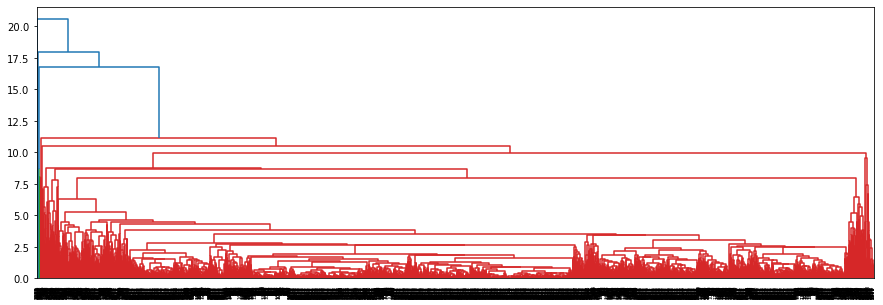

In [9]:
plt.figure(figsize=(15,5))
dendrogram=sch.dendrogram(sch.linkage(x,method='average')) # can use any method out of single,complete,average,centroid


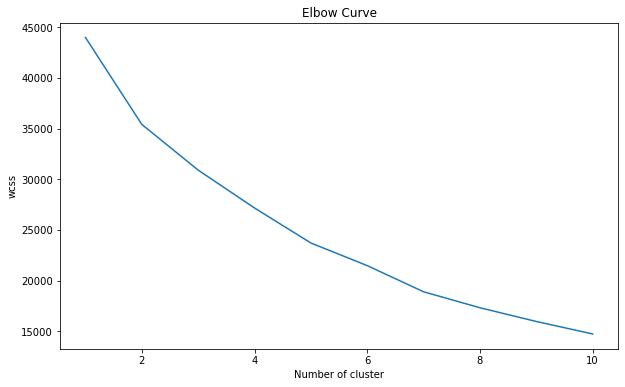

In [13]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

wcss=[]  # calculate within cluster sum of square distance

for i in range (1,11):  # range of no. of K (cluster)
    kmeans = KMeans (n_clusters=i, random_state=0)  # 
    kmeans.fit(x)   # x is normalize value for our data
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of cluster')
plt.ylabel('wcss')
plt.show()


In [15]:
model=KMeans(n_clusters=6)
model.fit(x)
model.labels_

array([0, 0, 0, ..., 3, 0, 0])

In [16]:
md=pd.Series(model.labels_) # converting numpy array into pandas series object
data['Cluster']=md
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [17]:
data.sort_values(by=['Cluster'])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
2468,2487,22077,0,1,1,1,1385,4,0,0,3187,0,0
2470,2489,95916,0,3,1,1,11845,11,0,0,3182,0,0
2471,2490,122164,0,2,1,1,9944,16,0,0,3182,0,0
2476,2495,98339,0,3,1,1,16336,13,0,0,3145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,2382,108081,0,5,1,5,217006,24,0,0,3567,1,5
1300,1313,737514,0,3,1,4,43993,40,2150,7,5030,0,5
3338,3361,84148,0,1,1,5,84148,7,0,0,1054,0,5
2955,2977,61474,0,1,1,4,47717,14,0,0,3354,0,5
